In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [71]:
df=pd.read_csv("D:\\assignment\\decision tree\\Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [72]:
df.shape

(400, 11)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [74]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [75]:
#transforming the object type data set into dummies& dropping first dummy varibale

In [76]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [77]:
#converting Shelveloc object data types columns into integers

In [78]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [79]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


## splitting the dataset

In [80]:
x1=df.iloc[:,0:10]
y=df['ShelveLoc']

In [81]:
x1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes
0,9.50,138,73,11,276,120,3,42,17,1
1,11.22,111,48,16,260,83,1,65,10,1
2,10.06,113,35,10,269,80,2,59,12,1
3,7.40,117,100,4,466,97,2,55,14,1
4,4.15,141,64,3,340,128,3,38,13,1
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1
396,6.14,139,23,3,37,120,2,55,11,0
397,7.41,162,26,12,368,159,2,40,18,1
398,5.94,100,79,7,284,95,3,50,12,1


In [82]:
x=x1.drop(['ShelveLoc'],axis=1)
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes
0,9.50,138,73,11,276,120,42,17,1
1,11.22,111,48,16,260,83,65,10,1
2,10.06,113,35,10,269,80,59,12,1
3,7.40,117,100,4,466,97,55,14,1
4,4.15,141,64,3,340,128,38,13,1
...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1
396,6.14,139,23,3,37,120,55,11,0
397,7.41,162,26,12,368,159,40,18,1
398,5.94,100,79,7,284,95,50,12,1


In [83]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

## splitting data set into training and testing

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)

## Building Decision Tree Classifier using Entropy Criteria

In [85]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [86]:
from sklearn import tree

[Text(0.5, 0.875, 'X[0] <= 6.175\nentropy = 1.43\nsamples = 280\nvalue = [56, 156, 68]'),
 Text(0.25, 0.625, 'X[2] <= 34.0\nentropy = 1.122\nsamples = 99\nvalue = [2, 50, 47]'),
 Text(0.125, 0.375, 'X[6] <= 61.5\nentropy = 0.61\nsamples = 20\nvalue = [0, 17, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.918\nsamples = 9\nvalue = [0, 6, 3]'),
 Text(0.375, 0.375, 'X[6] <= 40.5\nentropy = 1.131\nsamples = 79\nvalue = [2, 33, 44]'),
 Text(0.3125, 0.125, 'entropy = 0.503\nsamples = 18\nvalue = [0, 2, 16]'),
 Text(0.4375, 0.125, 'entropy = 1.174\nsamples = 61\nvalue = [2, 31, 28]'),
 Text(0.75, 0.625, 'X[0] <= 10.485\nentropy = 1.333\nsamples = 181\nvalue = [54, 106, 21]'),
 Text(0.625, 0.375, 'X[5] <= 119.5\nentropy = 1.23\nsamples = 141\nvalue = [27, 95, 19]'),
 Text(0.5625, 0.125, 'entropy = 1.014\nsamples = 80\nvalue = [5, 60, 15]'),
 Text(0.6875, 0.125, 'entropy = 1.248\nsamples = 61\nvalue = [22, 35, 4]'),
 Text(0.875, 

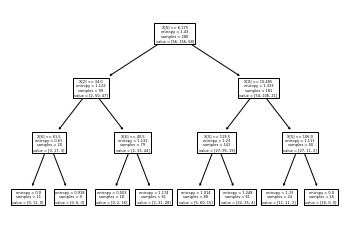

In [87]:
tree.plot_tree(model)

In [88]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [89]:
import matplotlib.pyplot as plt

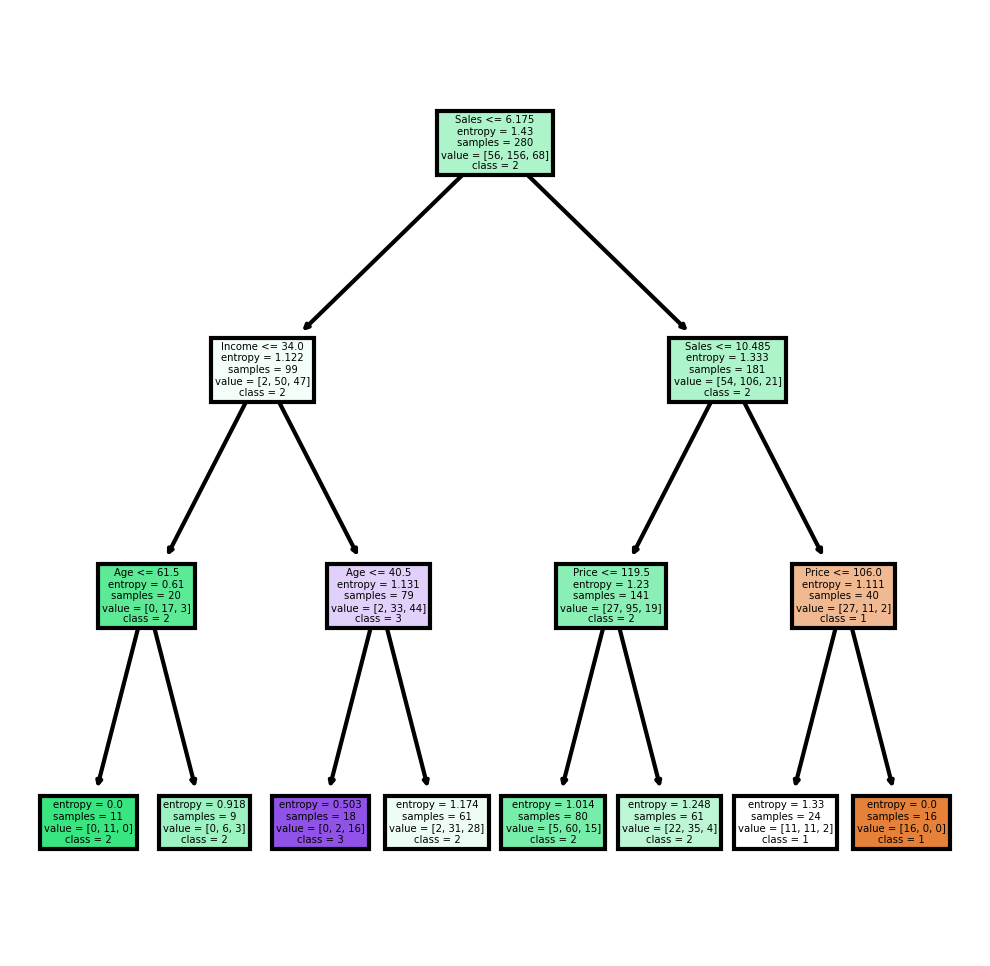

In [90]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_Yes','US_Yes']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [91]:
#Predicting on test data
predict = model.predict(x_test) # predicting on test data set 
pd.Series(predict).value_counts() 

2    92
1    22
3     6
dtype: int64

In [92]:
predict

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 2,
       2, 2, 1, 3, 2, 2, 2, 2, 2, 1], dtype=int64)

In [93]:
y_test.value_counts()

2    63
1    29
3    28
Name: ShelveLoc, dtype: int64

In [94]:
pd.crosstab(y_test,predict)

col_0,1,2,3
ShelveLoc,,,
1,17,12,0
2,4,56,3
3,1,24,3


In [95]:
# Accuracy 
np.mean(predict==y_test)*100

63.33333333333333

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.6333333333333333

## CART using gini

In [97]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [98]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [99]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [100]:
model_gini

DecisionTreeClassifier(max_depth=3)

In [101]:
pred=model.predict(x_test)

In [102]:
np.mean(pred==y_test)*100

63.33333333333333

## Decision Tree Regressor

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
X1=df.iloc[:,0:10]
Y=df['ShelveLoc']

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [106]:
model=DecisionTreeRegressor()
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [120]:
model.score(X_test,Y_test)

1.0